In [14]:
library(TCGAWorkflowData)
library(TCGAbiolinks)
library(maftools)
library(dplyr)
library("AnnotationDbi")



Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select




In [15]:
# GBMmut <- GDCquery_Maf(tumor = "GBM", pipelines = "mutect2")


 For more information about MAF data please read the following GDC manual and web pages:

 GDC manual: https://gdc-docs.nci.nih.gov/Data/PDF/Data_UG.pdf

 https://gdc-docs.nci.nih.gov/Data/Bioinformatics_Pipelines/DNA_Seq_Variant_Calling_Pipeline/

 https://gdc.cancer.gov/about-gdc/variant-calling-gdc


--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-GBM

--------------------

oo Filtering results

--------------------

ooo By access

ooo By data.type

ooo By workflow.type

----------------

oo Checking data

----------------

ooo Check if there are duplicated cases

ooo Check if there results for the query

-------------------

o Preparing output

-------------------


Of the 1 files for download 1 already exist.

All samples have bee

|==================================================================| 100% 114 MB


In [16]:
cluster_assignments <- read.csv('./Results/CancerSubnetwork_GBM/CancerSubnetwork_GBM_cluster_assignments.csv')

In [26]:
patients <- unlist(cluster_assignments['X'], use.names = FALSE)

In [17]:
cluster.1 <- cluster_assignments %>% filter(CC.Hard..k.4 == 1)
cluster.1 <- cluster.1[,1]
cluster.2 <- cluster_assignments %>% filter(CC.Hard..k.4 == 2)
cluster.2 <- cluster.2[,1]
cluster.3 <- cluster_assignments %>% filter(CC.Hard..k.4 == 3)
cluster.3 <- cluster.3[,1]
cluster.4 <- cluster_assignments %>% filter(CC.Hard..k.4 == 4)
cluster.4 <- cluster.4[,1]

In [25]:
unlist(cluster_assignments['X'], use.names = FALSE)

[1] "TCGA-02-0033" "TCGA-02-0047" "TCGA-02-0055" "TCGA-02-2466" "TCGA-02-2470"
  [6] "TCGA-02-2483" "TCGA-02-2485" "TCGA-02-2486" "TCGA-06-0119" "TCGA-06-0122"
 [11] "TCGA-06-0124" "TCGA-06-0125" "TCGA-06-0126" "TCGA-06-0129" "TCGA-06-0130"
 [16] "TCGA-06-0132" "TCGA-06-0137" "TCGA-06-0140" "TCGA-06-0141" "TCGA-06-0142"
 [21] "TCGA-06-0154" "TCGA-06-0157" "TCGA-06-0158" "TCGA-06-0168" "TCGA-06-0169"
 [26] "TCGA-06-0171" "TCGA-06-0184" "TCGA-06-0185" "TCGA-06-0187" "TCGA-06-0188"
 [31] "TCGA-06-0189" "TCGA-06-0190" "TCGA-06-0192" "TCGA-06-0209" "TCGA-06-0210"
 [36] "TCGA-06-0211" "TCGA-06-0213" "TCGA-06-0214" "TCGA-06-0216" "TCGA-06-0219"
 [41] "TCGA-06-0221" "TCGA-06-0237" "TCGA-06-0238" "TCGA-06-0241" "TCGA-06-0644"
 [46] "TCGA-06-0645" "TCGA-06-0646" "TCGA-06-0648" "TCGA-06-0649" "TCGA-06-0650"
 [51] "TCGA-06-0686" "TCGA-06-0744" "TCGA-06-0745" "TCGA-06-0749" "TCGA-06-0750"
 [56] "TCGA-06-0875" "TCGA-06-0876" "TCGA-06-0878" "TCGA-06-0879" "TCGA-06-0882"
 [61] "TCGA-06-0939" "TCGA-06-1087" "TCGA-06-1800" "TCGA-06-1801" "TCGA-06-1805"
 [66] "TCGA-06-1806" "TCGA-06-2557" "TCGA-06-2558" "TCGA-06-2559" "TCGA-06-2561"
 [71] "TCGA-06-2563" "TCGA-06-2564" "TCGA-06-2566" "TCGA-06-2567" "TCGA-06-2569"
 [76] "TCGA-06-2570" "TCGA-06-5408" "TCGA-06-5410" "TCGA-06-5411" "TCGA-06-5413"
 [81] "TCGA-06-5414" "TCGA-06-5417" "TCGA-06-5418" "TCGA-06-5856" "TCGA-06-5858"
 [86] "TCGA-06-5859" "TCGA-06-6388" "TCGA-06-6389" "TCGA-06-6390" "TCGA-06-6391"
 [91] "TCGA-06-6693" "TCGA-06-6694" "TCGA-06-6697" "TCGA-06-6698" "TCGA-06-6699"
 [96] "TCGA-06-6700" "TCGA-06-6701" "TCGA-06-A5U0" "TCGA-06-A5U1" "TCGA-06-A6S0"
[101] "TCGA-06-A6S1" "TCGA-06-A7TK" "TCGA-08-0386" "TCGA-12-0615" "TCGA-12-0616"
[106] "TCGA-12-0618" "TCGA-12-0619" "TCGA-12-0656" "TCGA-12-0662" "TCGA-12-0688"
[111] "TCGA-12-0691" "TCGA-12-0692" "TCGA-12-0707" "TCGA-12-0773" "TCGA-12-0775"
[116] "TCGA-12-0778" "TCGA-12-0818" "TCGA-12-0819" "TCGA-12-0820" "TCGA-12-0821"
[121] "TCGA-12-0822" "TCGA-12-0826" "TCGA-12-0827" "TCGA-12-0828" "TCGA-12-0829"
[126] "TCGA-12-1093" "TCGA-12-1597" "TCGA-12-1599" "TCGA-12-1602" "TCGA-12-3646"
[131] "TCGA-12-3648" "TCGA-12-3649" "TCGA-12-3650" "TCGA-12-3651" "TCGA-12-3652"
[136] "TCGA-12-3653" "TCGA-12-5295" "TCGA-12-5299" "TCGA-14-0740" "TCGA-14-0781"
[141] "TCGA-14-0786" "TCGA-14-0787" "TCGA-14-0789" "TCGA-14-0790" "TCGA-14-0812"
[146] "TCGA-14-0813" "TCGA-14-0817" "TCGA-14-0862" "TCGA-14-0866" "TCGA-14-0867"
[151] "TCGA-14-0871" "TCGA-14-1034" "TCGA-14-1043" "TCGA-14-1395" "TCGA-14-1396"
[156] "TCGA-14-1450" "TCGA-14-1453" "TCGA-14-1455" "TCGA-14-1456" "TCGA-14-1458"
[161] "TCGA-14-1794" "TCGA-14-1795" "TCGA-14-1821" "TCGA-14-1825" "TCGA-14-1827"
[166] "TCGA-14-1829" "TCGA-14-2554" "TCGA-14-3476" "TCGA-14-3477" "TCGA-14-4157"
[171] "TCGA-15-0742" "TCGA-16-0846" "TCGA-16-0848" "TCGA-16-0849" "TCGA-16-0861"
[176] "TCGA-16-1045" "TCGA-16-1460" "TCGA-19-0957" "TCGA-19-1385" "TCGA-19-1386"
[181] "TCGA-19-1387" "TCGA-19-1388" "TCGA-19-1389" "TCGA-19-1787" "TCGA-19-1790"
[186] "TCGA-19-2619" "TCGA-19-2623" "TCGA-19-2624" "TCGA-19-2625" "TCGA-19-2631"
[191] "TCGA-19-4065" "TCGA-19-4068" "TCGA-19-5947" "TCGA-19-5950" "TCGA-19-5951"
[196] "TCGA-19-5952" "TCGA-19-5953" "TCGA-19-5954" "TCGA-19-5956" "TCGA-19-5959"
[201] "TCGA-19-5960" "TCGA-19-A60I" "TCGA-19-A6J4" "TCGA-26-1799" "TCGA-26-5132"
[206] "TCGA-26-5135" "TCGA-26-5136" "TCGA-26-5139" "TCGA-26-6173" "TCGA-26-A7UX"
[211] "TCGA-27-1830" "TCGA-27-1831" "TCGA-27-1832" "TCGA-27-1833" "TCGA-27-1834"
[216] "TCGA-27-1835" "TCGA-27-1836" "TCGA-27-1837" "TCGA-27-2518" "TCGA-27-2519"
[221] "TCGA-27-2523" "TCGA-27-2524" "TCGA-27-2526" "TCGA-27-2527" "TCGA-27-2528"
[226] "TCGA-28-1745" "TCGA-28-1746" "TCGA-28-1749" "TCGA-28-1752" "TCGA-28-1753"
[231] "TCGA-28-1755" "TCGA-28-1757" "TCGA-28-1760" "TCGA-28-2501" "TCGA-28-2502"
[236] "TCGA-28-2506" "TCGA-28-2513" "TCGA-28-2514" "TCGA-28-5204" "TCGA-28-5207"
[241] "TCGA-28-5208" "TCGA-28-5209" "TCGA-28-5213" "TCGA-28-5214" "TCGA-28-5215"
[246] "TCGA-28-5216" "TCGA-28-521

In [5]:
getParticipantCode <- function(fullBarcode) {
  tcga.barcode.pattern <- '(TCGA-[A-Z0-9a-z]{2}-[a-zA-Z0-9]{4}).*'
  return(gsub(tcga.barcode.pattern, '\\1', fullBarcode))
}

In [7]:
GBMmut['Tumor_Sample_Barcode'] <- lapply(GBMmut['Tumor_Sample_Barcode'], getParticipantCode )

In [8]:
unique(GBMmut['Tumor_Sample_Barcode'])

Tumor_Sample_Barcode
<chr>
TCGA-06-5413
TCGA-28-1755
TCGA-32-1986
TCGA-19-4065
TCGA-06-0876
TCGA-12-1598
TCGA-76-4927
TCGA-14-1034
TCGA-32-2634


In [9]:
GBMmut

Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,⋯,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>
EIF4G3,8672,BI,GRCh38,chr1,20942250,20942250,+,Missense_Mutation,SNP,⋯,PASS,TTCTTGTTCTT,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM2153196;COSM2153197;COSM3400283,TRUE,Unknown
RPL5,6125,BI,GRCh38,chr1,92833398,92833398,+,Frame_Shift_Del,DEL,⋯,PASS,TTTGTTAAAGTT,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM2153192,TRUE,Unknown
SH2D1B,117157,BI,GRCh38,chr1,162398999,162398999,+,Missense_Mutation,SNP,⋯,PASS,AAAGGTGAACC,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM2153184,TRUE,Unknown
RYR2,6262,BI,GRCh38,chr1,237783900,237783900,+,Missense_Mutation,SNP,⋯,PASS,AGAAACGGAAT,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM210500;COSM3400535,TRUE,Unknown
APOB,338,BI,GRCh38,chr2,21005840,21005840,+,Silent,SNP,⋯,PASS,GGTAGGATGAT,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM2153186,TRUE,Unknown
AMER3,205147,BI,GRCh38,chr2,130763300,130763300,+,Missense_Mutation,SNP,⋯,PASS,CTGCCGCCACC,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM2153175,TRUE,Unknown
SCN3A,6328,BI,GRCh38,chr2,165140750,165140750,+,Silent,SNP,⋯,PASS,CCATTTGCTGG,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM2153176,TRUE,Unknown
TTN,7273,BI,GRCh38,chr2,178782350,178782350,+,Missense_Mutation,SNP,⋯,PASS,AAGGCGCGGCA,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,common_in_exac,COSM1664827;COSM1664828;COSM1664829;COSM1664830;COSM1664832,TRUE,Unknown
HDLBP,3069,BI,GRCh38,chr2,241262782,241262782,+,Missense_Mutation,SNP,⋯,PASS,CATGATGGAGA,7d060a45-0aa1-4adc-9b37-f7dde0d10b86,c3c27161-d0c1-4128-ade4-fbaa7ff76644,7965b35f-3ac0-447b-a672-dee39556f801,8d2e88d9-d8d0-4c42-8aa2-205a788dea58,NA,COSM2153185;COSM3407755,TRUE,Unknown


In [10]:
`cluster.1`

[1] "TCGA-02-0047" "TCGA-02-2466" "TCGA-02-2470" "TCGA-02-2486" "TCGA-06-0124"
  [6] "TCGA-06-0125" "TCGA-06-0126" "TCGA-06-0132" "TCGA-06-0140" "TCGA-06-0141"
 [11] "TCGA-06-0142" "TCGA-06-0154" "TCGA-06-0158" "TCGA-06-0168" "TCGA-06-0169"
 [16] "TCGA-06-0187" "TCGA-06-0192" "TCGA-06-0210" "TCGA-06-0211" "TCGA-06-0214"
 [21] "TCGA-06-0219" "TCGA-06-0237" "TCGA-06-0645" "TCGA-06-0646" "TCGA-06-0649"
 [26] "TCGA-06-0750" "TCGA-06-0878" "TCGA-06-1087" "TCGA-06-1806" "TCGA-06-2557"
 [31] "TCGA-06-2563" "TCGA-06-2567" "TCGA-06-2569" "TCGA-06-5408" "TCGA-06-5410"
 [36] "TCGA-06-5411" "TCGA-06-5414" "TCGA-06-5418" "TCGA-06-5856" "TCGA-06-5859"
 [41] "TCGA-06-6388" "TCGA-06-6693" "TCGA-06-6694" "TCGA-06-6699" "TCGA-06-6700"
 [46] "TCGA-06-A5U0" "TCGA-06-A5U1" "TCGA-06-A6S0" "TCGA-06-A6S1" "TCGA-06-A7TK"
 [51] "TCGA-08-0386" "TCGA-12-0615" "TCGA-12-0619" "TCGA-12-0662" "TCGA-12-0688"
 [56] "TCGA-12-0691" "TCGA-12-0692" "TCGA-12-0819" "TCGA-12-0826" "TCGA-12-1602"
 [61] "TCGA-12-3648" "TCGA-12-3650" "TCGA-12-3651" "TCGA-12-3652" "TCGA-12-3653"
 [66] "TCGA-12-5299" "TCGA-14-0786" "TCGA-14-0787" "TCGA-14-0789" "TCGA-14-0790"
 [71] "TCGA-14-0812" "TCGA-14-0862" "TCGA-14-1043" "TCGA-14-1395" "TCGA-14-1450"
 [76] "TCGA-14-1455" "TCGA-14-1827" "TCGA-14-1829" "TCGA-14-3477" "TCGA-15-0742"
 [81] "TCGA-19-1387" "TCGA-19-2619" "TCGA-19-2624" "TCGA-19-2631" "TCGA-19-4065"
 [86] "TCGA-19-4068" "TCGA-19-5947" "TCGA-19-5950" "TCGA-19-5951" "TCGA-19-5953"
 [91] "TCGA-19-5954" "TCGA-19-A60I" "TCGA-26-1799" "TCGA-26-5132" "TCGA-26-5135"
 [96] "TCGA-26-5139" "TCGA-26-6173" "TCGA-27-1831" "TCGA-27-1832" "TCGA-27-1833"
[101] "TCGA-27-1834" "TCGA-27-1835" "TCGA-27-1836" "TCGA-27-1837" "TCGA-27-2518"
[106] "TCGA-27-2524" "TCGA-28-1745" "TCGA-28-1755" "TCGA-28-2514" "TCGA-28-5207"
[111] "TCGA-28-5208" "TCGA-28-5209" "TCGA-28-5214" "TCGA-28-5218" "TCGA-28-6450"
[116] "TCGA-32-1979" "TCGA-32-1986" "TCGA-32-2638" "TCGA-32-4209" "TCGA-32-4211"
[121] "TCGA-32-5222" "TCGA-41-2571" "TCGA-41-2573" "TCGA-41-3393" "TCGA-41-4097"
[126] "TCGA-41-5651" "TCGA-41-6646" "TCGA-4W-AA9S" "TCGA-74-6575" "TCGA-74-6578"
[131] "TCGA-74-6584" "TCGA-76-4927" "TCGA-76-4928" "TCGA-76-6191" "TCGA-76-6280"
[136] "TCGA-76-6282" "TCGA-76-6285" "TCGA-76-6656" "TCGA-76-6664" "TCGA-81-5911"
[141] "TCGA-87-5896" "TCGA-OX-A56R" "TCGA-RR-A6KA" "TCGA-RR-A6KB" "TCGA-RR-A6KC"

In [11]:
cluster1_mut <- filter(GBMmut, Tumor_Sample_Barcode %in% cluster.1)
cluster2_mut <- filter(GBMmut, Tumor_Sample_Barcode %in% cluster.2)
cluster3_mut <- filter(GBMmut, Tumor_Sample_Barcode %in% cluster.3)
cluster4_mut <- filter(GBMmut, Tumor_Sample_Barcode %in% cluster.4)

In [12]:
cluster.1.genes <- (unlist(unique(cluster1_mut['Hugo_Symbol']), use.names = FALSE))
cluster.2.genes <- (unlist(unique(cluster2_mut['Hugo_Symbol']), use.names = FALSE))
cluster.3.genes <- (unlist(unique(cluster3_mut['Hugo_Symbol']), use.names = FALSE))
cluster.4.genes <- (unlist(unique(cluster4_mut['Hugo_Symbol']), use.names = FALSE))

In [13]:
common12 <- (intersect(cluster.1.genes, cluster.2.genes))
common34 <- (intersect(cluster.3.genes, cluster.4.genes))
common_genes <- (intersect(common12, common34))
length(common_genes)

[1] 641

[1] "SLC45A1"                "MUL1"                  
   [3] "DDOST"                  "EPHA10"                
   [5] "FGGY"                   "SERBP1"                
   [7] "CASQ2"                  "OTUD7B"                
   [9] "HRNR"                   "OLFML2B"               
  [11] "TNNT2"                  "DIEXF"                 
  [13] "PTPN14"                 "OR2T12"                
  [15] "OR2G6"                  "PUM2"                  
  [17] "GCKR"                   "VIT"                   
  [19] "PRKCE"                  "PPP1R21"               
  [21] "PSME4"                  "DYSF"                  
  [23] "SLC5A7"                 "IL36G"                 
  [25] "SCN1A"                  "TTN"                   
  [27] "FAM126B"                "IRS1"                  
  [29] "RBMS3"                  "GNL3"                  
  [31] "FAM208A"                "ADAMTS9"               
  [33] "MORC1"                  "ABTB1"                 
  [35] "ATR"                    "YEATS2"                
  [37] "ABCF3"                  "OTOP1"                 
  [39] "UCHL1"                  "LRRC66"                
  [41] "GSTCD"                  "ANK2"                  
  [43] "NDST3"                  "FAT4"                  
  [45] "FBXW7"                  "ENC1"                  
  [47] "CYSTM1"                 "C5orf46"               
  [49] "GABRG2"                 "HIST1H2BM"             
  [51] "SLC44A4"                "C6orf222"              
  [53] "BYSL"                   "ZNF318"                
  [55] "TCTE1"                  "ADGRF1"                
  [57] "SLC25A51P1"             "AIM1"                  
  [59] "LAMA4"                  "MIR548A2"              
  [61] "IL22RA2"                "HIVEP2"                
  [63] "RPS6KA2"                "TCP10"                 
  [65] "AHR"                    "HOXA7"                 
  [67] "COBL"                   "PIK3CG"                
  [69] "ZC3HC1"                 "WEE2"                  
  [71] "AOC1"                   "HTR5A"                 
  [73] "PTPRN2"                 "ST18"                  
  [75] "TRPA1"                  "TG"                    
  [77] "DENND3"                 "ZBTB5"                 
  [79] "RP11-204M4.2"           "GCNT1"                 
  [81] "RGS3"                   "COL5A1"                
  [83] "AKR1C1"                 "FRMD4A"                
  [85] "ABI1"                   "JMJD1C"                
  [87] "C10orf12"               "ZDHHC16"               
  [89] "PSD"                    "PNLIPRP1"              
  [91] "OR52M1"                 "MRGPRX1"               
  [93] "MADD"                   "OR10W1"                
  [95] "NXF1"                   "LRTOMT"                
  [97] "GRIA4"                  "FGF23"                 
  [99] "TPI1"                   "ATN1"                  
 [101] "TMBIM6"                 "DGKA"                  
 [103] "ARHGEF25"               "CIT"                   
 [105] "RPLP0"                  "TMEM132D"              
 [107] "DCAF11"                 "RP11-468E2.1"          
 [109] "GZMB"                   "AL391261.1"            
 [111] "NRXN3"                  "HHIPL1"                
 [113] "EVL"                    "SNORD116-6"            
 [115] "SNORD115-12"            "THBS1"                 
 [117] "PAK6"                   "RPAP1"                 
 [119] "PPIP5K1"                "CGNL1"                 
 [121] "C15orf59"               "PEAK1"                 
 [123] "RASGRF1"                "ABHD2"                 
 [125] "IFT140"                 "MKL2"                  
 [127] "TMEM159"                "GTF3C1"                
 [129] "SULT1A1"                "ITGAD"                 
 [131] "FAM65A"                 "CALB2"                 
 [133] "PLCG2"                  "CRK"                   
 [135] "RABEP1"                 "PITPNM3"               
 [137] "MPRIP"                  "SLC47A2"               
 [139] "GAST"                   "B4GALNT2"              
 [141] "ABCC3

In [33]:
maf <- read.maf(maf = cluster1_mut, isTCGA = TRUE)

-Validating
-Silent variants: 3553 
-Summarizing
--Possible FLAGS among top ten genes:
  MUC16
  FLG
-Processing clinical data
--Missing clinical data
-Finished in 0.425s elapsed (0.719s cpu) 


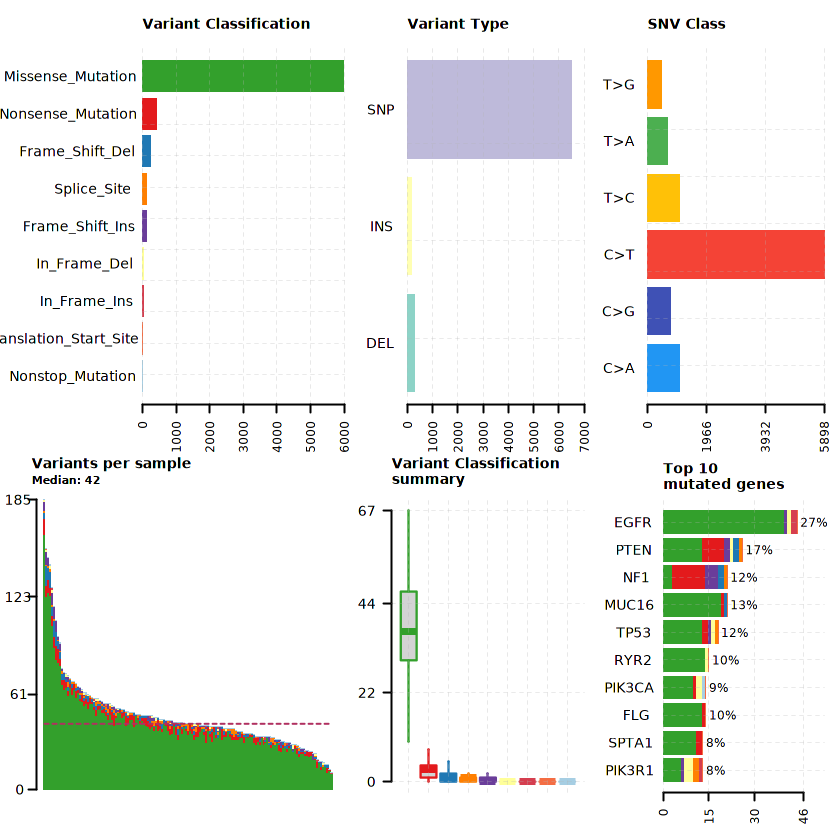

In [53]:
plotmafSummary(
  maf = maf,
  rmOutlier = TRUE,
  addStat = 'median',
  dashboard = TRUE
)

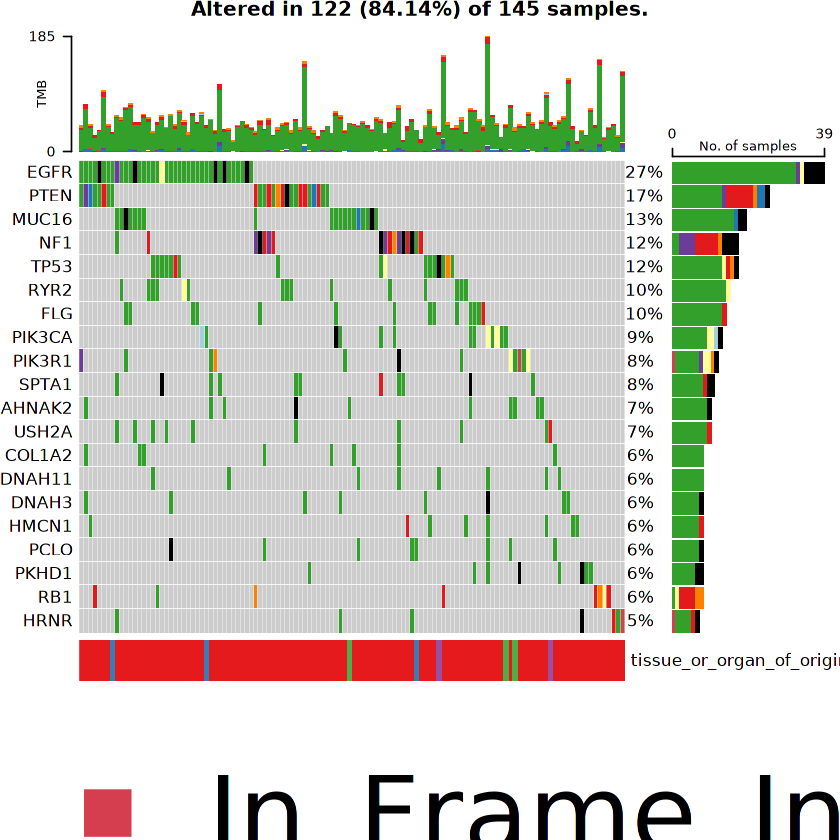

In [54]:
oncoplot(
  maf = maf,
  top = 20,
  legendFontSize = 8,
  clinicalFeatures = c("tissue_or_organ_of_origin")
)

Looking for clinical data in annoatation slot of MAF..

Number of mutated samples for given genes: 



TP53 
  17 


Median survival..



    Group medianTime   N
1: Mutant        369  17
2:     WT        297 128


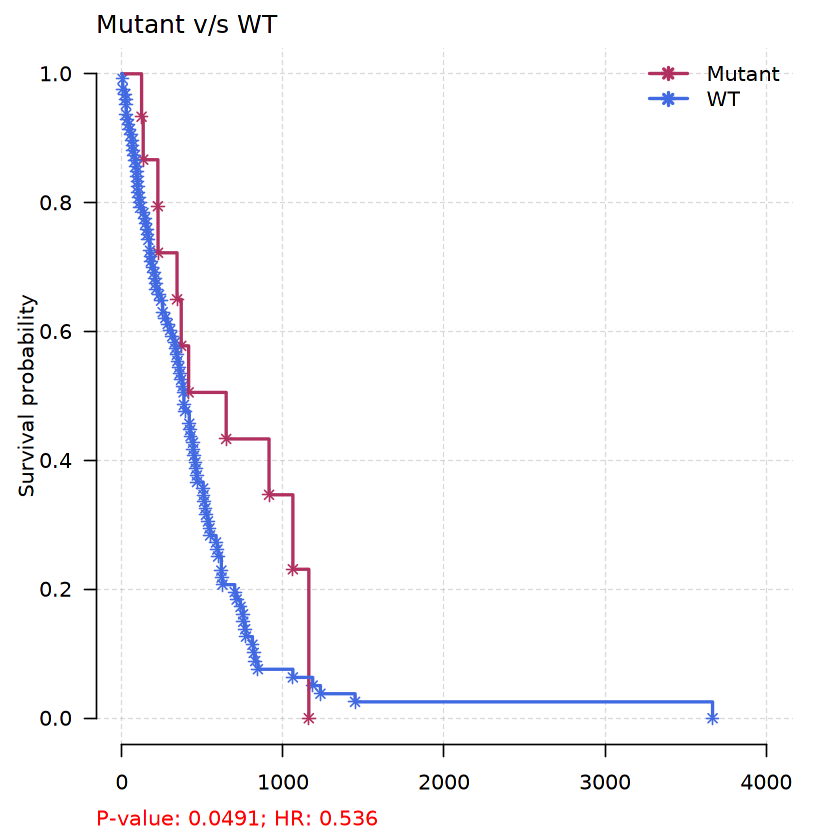

In [62]:
plot <- mafSurvival(
  maf = maf,
  genes = "TP53",
  time = 'time',
  Status = 'Overall_Survival_Status',
  isTCGA = TRUE
)

In [43]:
maf <- read.maf(maf = cluster4_mut, isTCGA = TRUE)

-Validating
-Silent variants: 1810 
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  MUC16
  HMCN1
  FLG
-Processing clinical data
--Missing clinical data
-Finished in 0.236s elapsed (0.434s cpu) 


In [45]:
gbm_clin <- GDCquery_clinic(project = "TCGA-GBM", type = "Clinical")

In [46]:
gbm_clin

submitter_id,synchronous_malignancy,tumor_stage,days_to_diagnosis,created_datetime,last_known_disease_status,tissue_or_organ_of_origin,days_to_last_follow_up,primary_diagnosis,age_at_diagnosis,⋯,treatments_radiation_treatment_type,treatments_radiation_therapeutic_agents,treatments_radiation_treatment_or_therapy,treatments_radiation_treatment_effect,treatments_radiation_initial_disease_status,treatments_radiation_treatment_anatomic_site,treatments_radiation_treatment_intent_type,treatments_radiation_treatment_outcome,bcr_patient_barcode,disease
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,⋯,<chr>,<lgl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
TCGA-02-0339,Not Reported,not reported,0,NA,not reported,"Brain, NOS",377,Glioblastoma,24524,⋯,"Radiation Therapy, NOS",NA,yes,NA,NA,NA,NA,NA,TCGA-02-0339,GBM
TCGA-12-0820,Not Reported,not reported,0,NA,not reported,"Brain, NOS",562,Glioblastoma,14878,⋯,"Radiation Therapy, NOS",NA,yes,NA,NA,NA,NA,NA,TCGA-12-0820,GBM
TCGA-06-0209,Not Reported,not reported,0,NA,not reported,"Brain, NOS",119,Glioblastoma,27877,⋯,"Radiation Therapy, NOS",NA,yes,NA,NA,NA,NA,NA,TCGA-06-0209,GBM
TCGA-06-6390,Not Reported,not reported,0,NA,not reported,"Brain, NOS",164,Glioblastoma,21328,⋯,"Radiation Therapy, NOS",NA,yes,NA,NA,NA,NA,NA,TCGA-06-6390,GBM
TCGA-4W-AA9R,No,not reported,0,NA,not reported,"Brain, NOS",124,Glioblastoma,22317,⋯,"Radiation Therapy, NOS",NA,yes,NA,NA,NA,NA,NA,TCGA-4W-AA9R,GBM
TCGA-06-0119,No,not reported,0,NA,not reported,"Brain, NOS",NA,Glioblastoma,29606,⋯,"Radiation Therapy, NOS",NA,no,NA,NA,NA,NA,NA,TCGA-06-0119,GBM
TCGA-06-2559,Not Reported,not reported,0,NA,not reported,"Brain, NOS",150,Glioblastoma,30580,⋯,"Radiation Therapy, NOS",NA,yes,NA,NA,NA,NA,NA,TCGA-06-2559,GBM
TCGA-02-0258,Not Reported,not reported,0,NA,not reported,"Brain, NOS",503,Glioblastoma,13269,⋯,"Radiation Therapy, NOS",NA,yes,NA,NA,NA,NA,NA,TCGA-02-0258,GBM
TCGA-06-0131,Not Reported,not reported,NA,2019-04-28T14:53:00.708285-05:00,not reported,"Brain, NOS",NA,Glioblastoma,NA,⋯,"Radiation Therapy, NOS",NA,not reported,NA,NA,NA,NA,NA,TCGA-06-0131,GBM


In [47]:
cluster1_clin <- filter(gbm_clin, submitter_id %in% cluster.1)
cluster2_clin <- filter(gbm_clin, submitter_id %in% cluster.2)
cluster3_clin <- filter(gbm_clin, submitter_id %in% cluster.3)
cluster4_clin <- filter(gbm_clin, submitter_id %in% cluster.4)

In [51]:
colnames(cluster1_clin)[1] <- "Tumor_Sample_Barcode"
plyr::count(cluster1_clin$vital_status)
maf <- read.maf(maf = mut, clinicalData = clinical, isTCGA = TRUE)$Overall_Survival_Status <- 1 # dead
cluster1_clin$Overall_Survival_Status[which(cluster1_clin$vital_status != "Dead")] <- 0
cluster1_clin$time <- cluster1_clin$days_to_death
cluster1_clin$time[is.na(cluster1_clin$days_to_death)] <- cluster1_clin$days_to_last_follow_up[is.na(cluster1_clin$days_to_death)]

x,freq
<chr>,<int>
Alive,31
Dead,114


In [52]:
maf <- read.maf(maf = cluster1_mut, clinicalData = cluster1_clin, isTCGA = TRUE)

-Validating
-Silent variants: 3553 
-Summarizing
--Possible FLAGS among top ten genes:
  MUC16
  FLG
-Processing clinical data
-Finished in 0.482s elapsed (0.820s cpu) 


In [3]:
load('gbmExp.rda')

In [4]:
data

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

class: RangedSummarizedExperiment 
dim: 19947 156 
metadata(1): data_release
assays(2): raw_count scaled_estimate
rownames(19947): A1BG|1 A2M|2 ... TMED7-TICAM2|100302736
  LOC100303728|100303728
rowData names(4): gene_id entrezgene ensembl_gene_id
  transcript_id.transcript_id_TCGA-06-0184-01A-01R-1849-01
colnames(156): TCGA-06-0184-01A-01R-1849-01
  TCGA-02-2485-01A-01R-1849-01 ... TCGA-06-0156-01A-02R-1849-01
  TCGA-19-2620-01A-01R-1850-01
colData names(106): barcode patient ...
  paper_Telomere.length.estimate.in.blood.normal..Kb.
  paper_Telomere.length.estimate.in.tumor..Kb.

In [27]:
patient_names_seq <- unlist(lapply(colnames(data),getParticipantCode))

In [28]:
length(intersect(patient_names_seq, patients ))

[1] 122